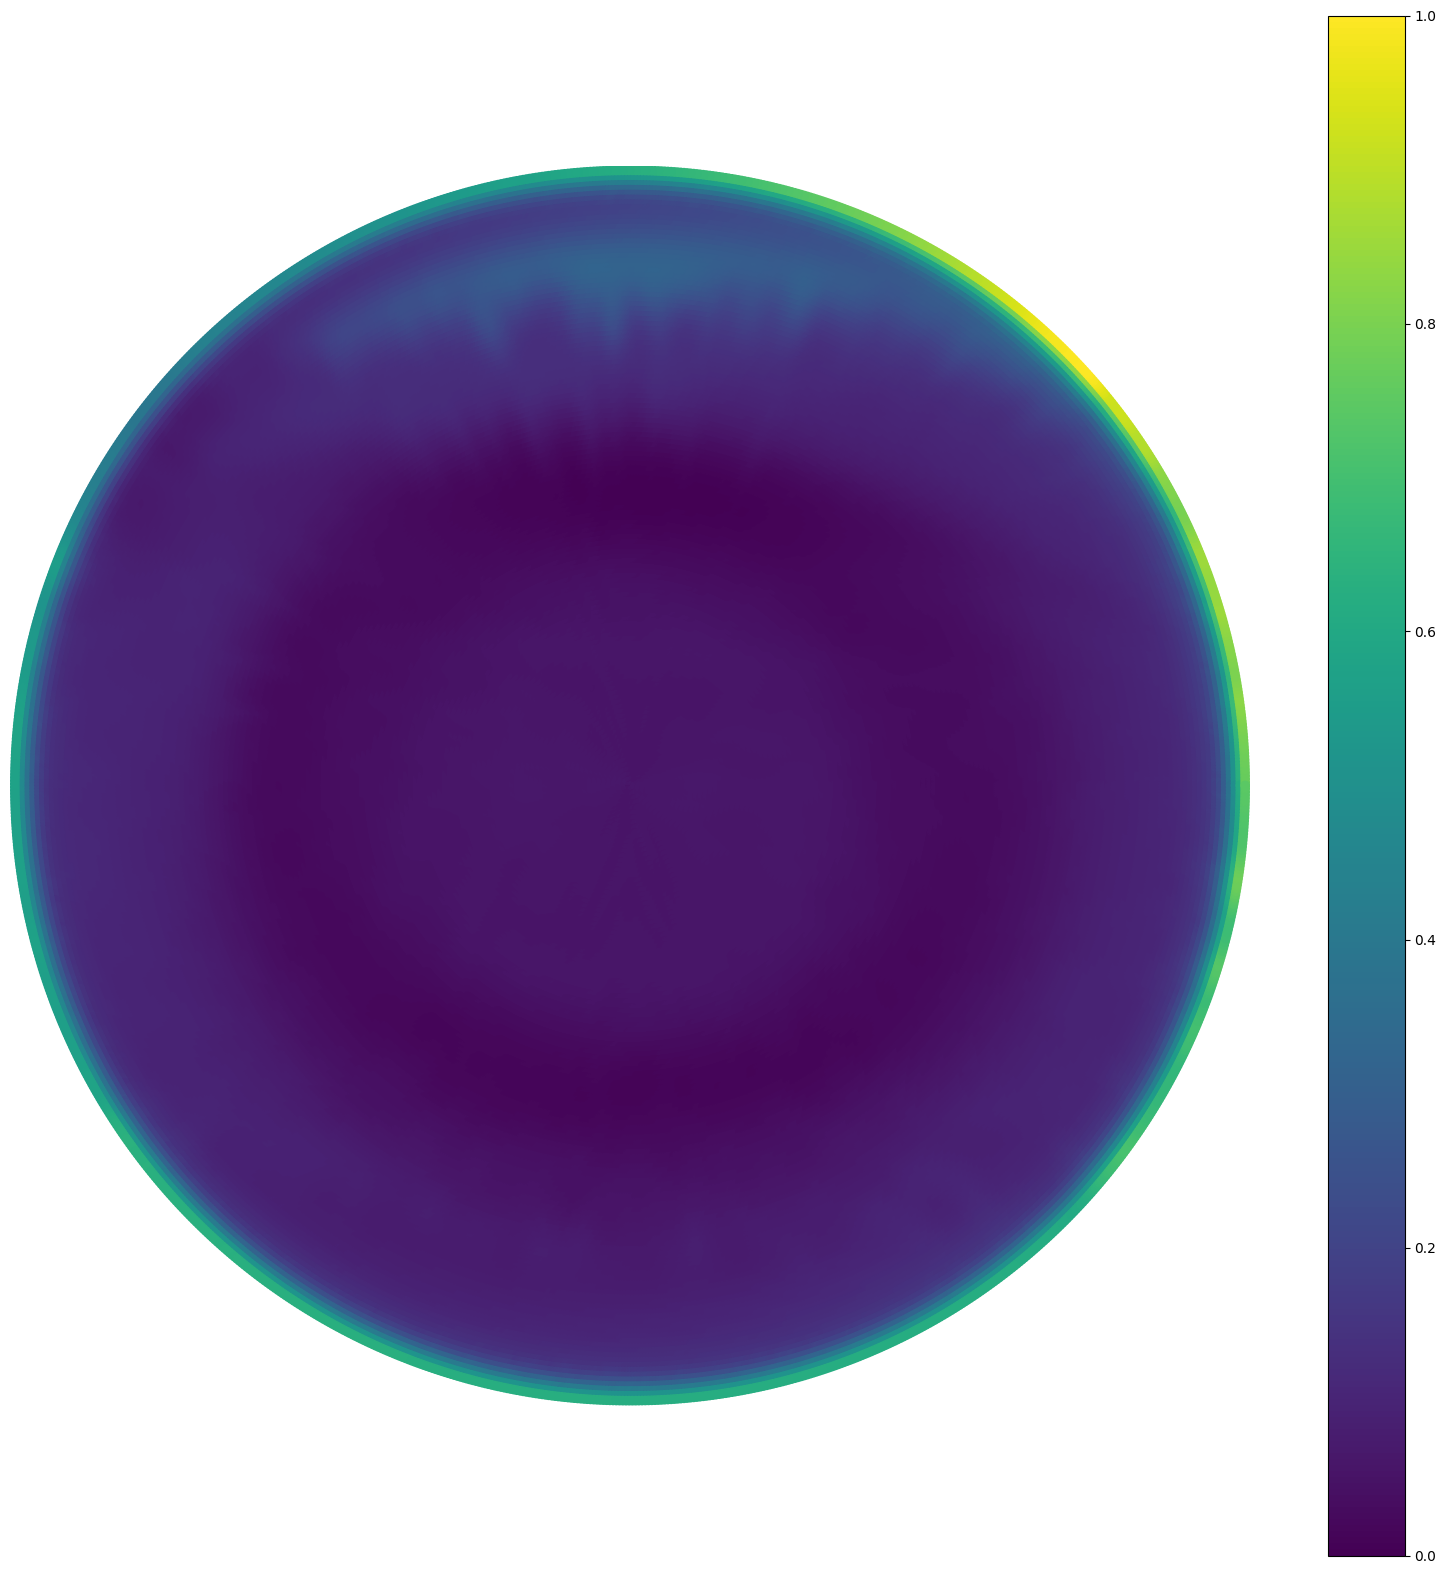

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import griddata

def load_data(dir):
    data = []
    # 打开文件
    with open(dir, 'r') as file:
        # 逐行读取文件内容
        for line in file:
            # 使用split()方法按空格分割每一行数据，得到一个浮点数列表
            float_values = [float(value) for value in line.split()]
            # 将该行数据添加到总数据列表中
            data.append(float_values)
    return data


def visualize_matrix(matrix_data):
    # 使用Seaborn绘制热力图
    plt.figure(figsize=(12, 8))  # 设置图形大小
    sns.heatmap(matrix_data, cmap='viridis')  # 使用viridis颜色映射
    plt.title('Heatmap of Matrix Data')  # 设置标题
    plt.xlabel('Columns')  # 设置x轴标签
    plt.ylabel('Rows')  # 设置y轴标签
    plt.show()

def visualize_circle(data, save_path=None):
  
    # 生成一些示例数据，这里假设你的数据是一个长度为30的列表
    data = data.T   #每行是一个同心圆
    mvalue=0
            
            
    
    
    data = data-data.min()
    
    
    
    data = data/data.max()
   

    # 计算同心圆的半径
    max_radius = 10  # 最大半径
    radius_step = max_radius / len(data)  # 半径步长

    # 创建画布和子图
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_aspect('equal')

    # 绘制同心圆热力图
    x_list = []
    y_list = []
    c_list = []
    for circle_id in range(len(data)):
        theta = np.linspace(0, 2 * np.pi, data.shape[1])  # 以数据的长度生成角度范围
        r = circle_id * radius_step  # 当前半径
        x = r * np.cos(theta)  # x坐标
        y = r * np.sin(theta)  # y坐标
        #colors = plt.cm.hot((data[circle_id])/10)  # 根据数据值选择颜色
        colors = data[circle_id]
        
        #colors = plt.cm.hot(np.linspace(0, 1, len(theta)))  # 每个点的颜色
        #for i in range(len(x)):
        #ax.scatter(x, y, c=colors,cmap='viridis')
        x_list.append(x)
        y_list.append(y)
        c_list.append(colors)

    x_list = np.concatenate(x_list,axis=0)
    y_list = np.concatenate(y_list,axis=0)
    c_list = np.concatenate(c_list,axis=0)

    scatter = ax.scatter(x_list, y_list, c=c_list,cmap='viridis')

    # 添加颜色条
    cbar = fig.colorbar(scatter, ax=ax)
    # 设置坐标轴
    ax.set_xlim(-max_radius, max_radius)
    ax.set_ylim(-max_radius, max_radius)
    ax.axis('off')  # 关闭坐标轴
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    # 显示图形
    #plt.savefig('axl.png',dpi=300)
    plt.show()



def Find_vacancy_insert(data, l, upscale_factor=4):
    """
    对数据进行二维插值，跨列和跨行填补缺失值，并通过更高分辨率插值提高精确度。
    """
    # 转换非零值
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[i, j] > 0.1:
                data[i, j] = 337.5 / data[i, j]

    # 模拟环形数据结构，扩展线性列表，使头尾紧邻
    data_tail = data[:, -l:]
    data_head = data[:, :l]
    data = np.concatenate((data_tail, data, data_head), axis=1)

    # 创建原始网格
    x, y = np.indices(data.shape)
    known_points = np.array([x[~np.isnan(data)], y[~np.isnan(data)]]).T
    known_values = data[~np.isnan(data)]

    # 创建更高分辨率的插值网格
    x_dense = np.linspace(0, data.shape[0] - 1, data.shape[0] * upscale_factor)
    y_dense = np.linspace(0, data.shape[1] - 1, data.shape[1] * upscale_factor)
    x_dense_grid, y_dense_grid = np.meshgrid(x_dense, y_dense, indexing='ij')

    # 在高分辨率网格上进行插值
    filled_data = griddata(known_points, known_values, (x_dense_grid, y_dense_grid), method='cubic', fill_value=0)

    # 还原到原始大小，去掉扩展部分
    filled_data = filled_data[:, l * upscale_factor: -l * upscale_factor]

    return filled_data



dir = '/Users/txh/Desktop/research/lwk/ok/6.0_after_filtering/1/period2_0001yukaize_Left_2022-01-8_14-05-36.tgl'
origin_data = load_data(dir)
# 统计各行的长度
length_data = np.zeros(len(origin_data)).astype(np.int32)
for i,line in enumerate(origin_data):
    length_data[i] = len(line)
max_length = max(length_data)   # 最大长度
# 填补数据
pad_data = np.zeros((len(origin_data),max_length),dtype=np.float32)
for i,line in enumerate(origin_data):
    pad_data[i,:len(line)] = np.array(line)
    
tmp=[]
tmp=Find_vacancy_insert(pad_data.copy().T, 18)
tmp=tmp.T

c=tmp.copy()

for i in range (pad_data.shape[0]):
        for j in range (pad_data.shape[1]):
            if pad_data[i][j]>0.1:
                pad_data[i][j]=337.5/pad_data[i][j]  

#visualize_circle(pad_data, save_path='/Users/txh/Desktop/pad_data.png')
visualize_circle(c)

In [13]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import uuid  # 用于生成唯一的目录名


def load_data(filepath):
    data = []
    with open(filepath, 'r') as file:
        for line in file:
            float_values = [float(value) for value in line.split()]
            data.append(float_values)
    return data


def find_vacancy_insert(data, l, upscale_factor=4):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[i, j] > 0.1:
                data[i, j] = 337.5 / data[i, j]

    data_tail = data[:, -l:]
    data_head = data[:, :l]
    data = np.concatenate((data_tail, data, data_head), axis=1)

    x, y = np.indices(data.shape)
    known_points = np.array([x[~np.isnan(data)], y[~np.isnan(data)]]).T
    known_values = data[~np.isnan(data)]

    x_dense = np.linspace(0, data.shape[0] - 1, data.shape[0] * upscale_factor)
    y_dense = np.linspace(0, data.shape[1] - 1, data.shape[1] * upscale_factor)
    x_dense_grid, y_dense_grid = np.meshgrid(x_dense, y_dense, indexing='ij')

    filled_data = griddata(known_points, known_values, (x_dense_grid, y_dense_grid), method='cubic', fill_value=0)
    filled_data = filled_data[:, l * upscale_factor: -l * upscale_factor]
    return filled_data


def visualize_circle(data, save_path=None):
    data = data.T
    data = (data - data.min()) / (data.max() - data.min())

    max_radius = 10
    radius_step = max_radius / len(data)
    
    fig, ax = plt.subplots(figsize=(20, 20))
    ax.set_aspect('equal')
    
    x_list, y_list, c_list = [], [], []
    for circle_id in range(len(data)):
        theta = np.linspace(0, 2 * np.pi, data.shape[1])
        r = circle_id * radius_step
        x, y = r * np.cos(theta), r * np.sin(theta)
        colors = data[circle_id]
        x_list.append(x)
        y_list.append(y)
        c_list.append(colors)

    x_list = np.concatenate(x_list, axis=0)
    y_list = np.concatenate(y_list, axis=0)
    c_list = np.concatenate(c_list, axis=0)

    scatter = ax.scatter(x_list, y_list, c=c_list, cmap='viridis')
    fig.colorbar(scatter, ax=ax)
    ax.set_xlim(-max_radius, max_radius)
    ax.set_ylim(-max_radius, max_radius)
    ax.axis('off')

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close(fig)


def process_folder(input_dir, output_dir):
    for root, dirs, files in os.walk(input_dir):
        for folder in ["L", "R"]:  # 遍历每个 L 和 R 文件夹
            folder_path = os.path.join(root, folder)
            if os.path.exists(folder_path):
                # 为每个 L 或 R 生成一个随机目录名
                unique_folder = str(uuid.uuid4())[:8]
                save_dir = os.path.join(output_dir, unique_folder)
                os.makedirs(save_dir, exist_ok=True)
                
                for i in range(5):  # 遍历 0 到 4 子文件夹
                    subfolder = os.path.join(folder_path, str(i))
                    if os.path.exists(subfolder):
                        for file in os.listdir(subfolder):
                            if file.endswith('.tgl'):
                                input_file = os.path.join(subfolder, file)

                                # 加载和填充数据
                                origin_data = load_data(input_file)
                                length_data = np.zeros(len(origin_data)).astype(np.int32)
                                for j, line in enumerate(origin_data):
                                    length_data[j] = len(line)
                                max_length = max(length_data)
                                
                                pad_data = np.zeros((len(origin_data), max_length), dtype=np.float32)
                                for j, line in enumerate(origin_data):
                                    pad_data[j, :len(line)] = np.array(line)

                                # 插值处理
                                interpolated_data = find_vacancy_insert(pad_data.copy().T, 18).T

                                # 保存图像
                                save_path = os.path.join(save_dir, f"{i}.png")
                                visualize_circle(interpolated_data, save_path)
                                print(f"Saved: {save_path}")


# 主程序入口
input_dir = '/Users/txh/Desktop/research/lwk/ok/Data/Data/5.8'
output_dir = '/Users/txh/Desktop/new_data_list'
process_folder(input_dir, output_dir)


Saved: /Users/txh/Desktop/new_data_list/8ec8ccf4/0.png
Saved: /Users/txh/Desktop/new_data_list/8ec8ccf4/1.png
Saved: /Users/txh/Desktop/new_data_list/8ec8ccf4/2.png
Saved: /Users/txh/Desktop/new_data_list/8ec8ccf4/3.png
Saved: /Users/txh/Desktop/new_data_list/8ec8ccf4/4.png
Saved: /Users/txh/Desktop/new_data_list/00f720bc/0.png
Saved: /Users/txh/Desktop/new_data_list/00f720bc/1.png
Saved: /Users/txh/Desktop/new_data_list/00f720bc/2.png
Saved: /Users/txh/Desktop/new_data_list/00f720bc/3.png
Saved: /Users/txh/Desktop/new_data_list/00f720bc/4.png
Saved: /Users/txh/Desktop/new_data_list/2323246d/0.png
Saved: /Users/txh/Desktop/new_data_list/2323246d/3.png
Saved: /Users/txh/Desktop/new_data_list/2323246d/4.png
Saved: /Users/txh/Desktop/new_data_list/308b2987/0.png
Saved: /Users/txh/Desktop/new_data_list/308b2987/3.png
Saved: /Users/txh/Desktop/new_data_list/308b2987/4.png
Saved: /Users/txh/Desktop/new_data_list/b388a7b8/0.png
Saved: /Users/txh/Desktop/new_data_list/b388a7b8/1.png
Saved: /Us